<h3>Task-4</h3>

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [44]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import nltk
print(nltk.__file__)


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\nltk\__init__.py


In [10]:
!pip uninstall nltk -y
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:

# Load data
data = pd.read_csv("C:\\Users\\Hp\\Downloads\\archive (8)\\twitter_training.csv")


In [16]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [36]:

# Display initial rows and column information
print("Data Preview:")
print(data.head())
print("\nColumn Information:")
print(data.info())


Data Preview:
     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  vader_sentiment  \
0  I am coming to the borders and I will kill you...          -0.6908   
1  im getting on borderlands and i will kill you ...          -0.6908   
2  im coming on borderlands and i will murder you...          -0.6908   
3  im getting on borderlands 2 and i will murder ...          -0.6908   
4  im getting into borderlands and i can murder y...          -0.6908   

  sentiment_category  
0           Negative  
1           Negative  
2           Negative  
3           Negative  
4           Negative  

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -

In [37]:

# Apply sentiment analysis
data['vader_sentiment'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
data

,id,topic,sentiment,text,vader_sentiment,sentiment_category
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,-0.6908,Negative
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,-0.6908,Negative
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,-0.6908,Negative
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,-0.6908,Negative
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,-0.6908,Negative
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,0.0772,Positive
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,-0.2960,Negative
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,-0.2960,Negative
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,0.0772,Positive


In [38]:

# Categorize sentiment based on compound score
data['sentiment_category'] = data['vader_sentiment'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')
data

,id,topic,sentiment,text,vader_sentiment,sentiment_category
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,-0.6908,Negative
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,-0.6908,Negative
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,-0.6908,Negative
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,-0.6908,Negative
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,-0.6908,Negative
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,0.0772,Positive
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,-0.2960,Negative
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,-0.2960,Negative
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,0.0772,Positive


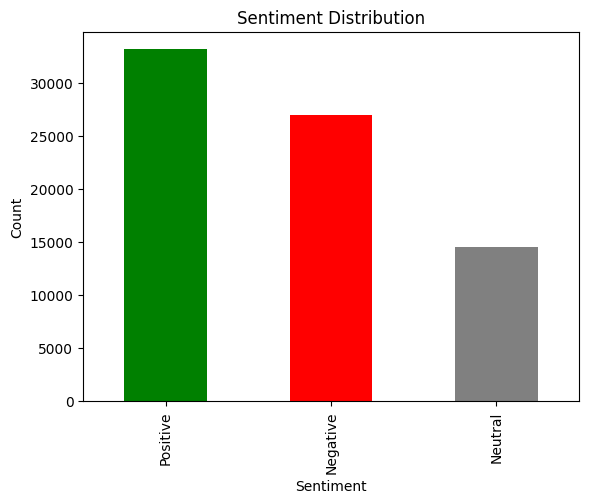

In [39]:

# Plot sentiment distribution
data['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


                                                text  vader_sentiment  \
0  I am coming to the borders and I will kill you...          -0.6908   
1  im getting on borderlands and i will kill you ...          -0.6908   
2  im coming on borderlands and i will murder you...          -0.6908   
3  im getting on borderlands 2 and i will murder ...          -0.6908   
4  im getting into borderlands and i can murder y...          -0.6908   

  sentiment_category  
0           Negative  
1           Negative  
2           Negative  
3           Negative  
4           Negative  


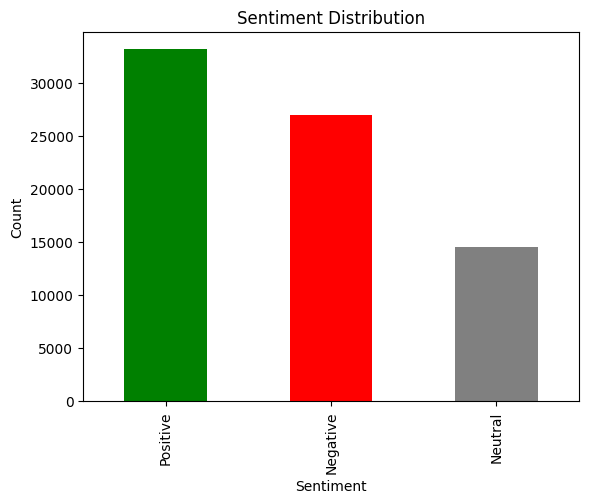

In [46]:

if 'text' not in data.columns:
    print("Please check the column names in the dataset. Adjust the column 'text' accordingly.")
else:
    # Instantiate the VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis on the 'text' column
    data['vader_sentiment'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Categorize sentiment based on compound score
    data['sentiment_category'] = data['vader_sentiment'].apply(
        lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral'
    )

    # Display the updated dataframe with sentiment scores and categories
    print(data[['text', 'vader_sentiment', 'sentiment_category']].head())

    # Plot sentiment distribution
    data['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()